# Vehicle Image Processing Project

# Download Random Images of 7 Vehicles

In [1]:
from bing_image_downloader import downloader
keywords = ['Car', 'Motorcycle', 'Cycle', 'Truck', 'Train', 'Airplane', 'Helicopter']
num_images_per_keyword = 50

for keyword in keywords:
    downloader.download(keyword, limit=num_images_per_keyword, output_dir='downloads', adult_filter_off=True, force_replace=False, timeout=60)

"keywords = ['Car', 'Motorcycle', 'Cycle', 'Truck', 'Train', 'Airplane', 'Helicopter']\nnum_images_per_keyword = 50\n\nfor keyword in keywords:\n    downloader.download(keyword, limit=num_images_per_keyword, output_dir='downloads', adult_filter_off=True, force_replace=False, timeout=60)"

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from skimage import io,color,feature,transform
from PIL import Image
from sklearn.metrics import confusion_matrix

# Define Your Image Directory

In [3]:
file_dir = "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads"
Airplane = "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Airplane"
Bicycle  = "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Bicycle"
'''Motorcycle = "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Motorcycle"
Car        =  "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Car"
Helicopter =  "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Helicopter"
Train      =   "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Train"
Truck      =   "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Truck"'''

'Motorcycle = "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Motorcycle"\nCar        =  "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Car"\nHelicopter =  "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Helicopter"\nTrain      =   "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Train"\nTruck      =   "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\\Truck"'

In [4]:
Vehicle_Type = ['Airplane','Bicycle','Car','Helicopter','Motorcycle','Train','Truck']

# Load And Preprocess Images

In [5]:
def preprocess_image(folder_path,label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder_path, filename))
            img = img.resize((256,256)) 
            img_array = np.array(img)
            images.append(img_array.flatten())
            labels.append(label)
    return images, labels

In [6]:
Airplane_images, Airplane_labels = preprocess_image(Airplane,label=0)
Bicycle_images, Bicycle_labels = preprocess_image(Bicycle,label=1)
'''Motorcycle_images, Motorcycle_labels = preprocess_image(Motorcycle,label=2)
Car_images, Car_labels = preprocess_image(Car,label=3)
Helicopter_images, Helicopter_labels = preprocess_image(Helicopter,label=4)
Truck_images, Truck_labels = preprocess_image(Truck,label=5)
Train_images, Train_labels = preprocess_image(Train,label=6)'''

'Motorcycle_images, Motorcycle_labels = preprocess_image(Motorcycle,label=2)\nCar_images, Car_labels = preprocess_image(Car,label=3)\nHelicopter_images, Helicopter_labels = preprocess_image(Helicopter,label=4)\nTruck_images, Truck_labels = preprocess_image(Truck,label=5)\nTrain_images, Train_labels = preprocess_image(Train,label=6)'

In [7]:
X = Airplane_images+Bicycle_images#+Motorcycle_images+Car_images+Helicopter_images+Truck_images+Train_images
Y = Airplane_labels+Bicycle_labels#+Motorcycle_labels+Car_labels+Helicopter_labels+Truck_labels+Train_labels

# Split The Data Into Training and Testing Sets

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Train The Decision Tree Classifier

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
Y_pred = clf.predict(X_test)

In [11]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 57.89%


# Preprocess Single image to classify vehicle

In [12]:
def preprocess_image2(image_path):
    img = Image.open(image_path)
    img = img.resize((256,256))  
    img_array = np.array(img)
    img_flat = img_array.flatten()  
    return img, img_flat

In [13]:
random_image_path1 = "C:\\Users\\User\\Downloads\\airplanepic.jpg"
random_image1, random_image_flat1 = preprocess_image2(random_image_path1)

In [14]:
prediction1 = clf.predict([random_image_flat1])

In [15]:
if prediction1[0] == 0:
    prediction_label1 = "Airplane"
else:
    prediction_label1 = "Bicycle"

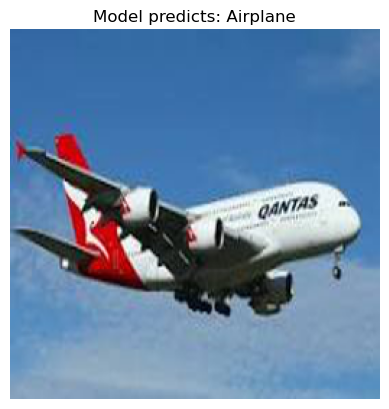

In [16]:
plt.imshow(random_image1)
plt.title(f"Model predicts: {prediction_label1}")
plt.axis('off') 
plt.show()

In [17]:
random_image_path2 = "C:\\Users\\User\\Documents\\Training_DataAnalysis\\Image Processing - Project 2\\downloads\Bicycle\\image_13.jpg"
random_image2, random_image_flat2 = preprocess_image2(random_image_path2)

In [18]:
prediction2 = clf.predict([random_image_flat2])

In [19]:
if prediction2[0] == 0:
    prediction_label2 = "Airplane"
else:
    prediction_label2 = "Bicycle"

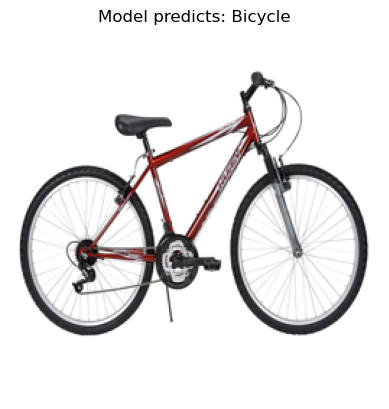

In [20]:
plt.imshow(random_image2)
plt.title(f"Model predicts: {prediction_label2}")
plt.axis('off') 
plt.show()

# KNN Algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
Vehicle_Types = ['Airplane','Bicycle']

In [23]:
label_map = {vehicle_type: label for label, vehicle_type in enumerate(Vehicle_Type)}

In [24]:
for vehicle_type in Vehicle_Type:
    folder_path = os.path.join(file_dir, vehicle_type)
    label = label_map[vehicle_type]
    preprocess_image(folder_path, label)

In [25]:
k = 5 
clf2 = KNeighborsClassifier(n_neighbors=k)
clf2.fit(X_train, Y_train)

KNeighborsClassifier()

In [26]:
Y_pred2 = clf2.predict(X_test)

In [27]:
accuracy = accuracy_score(Y_test, Y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.21%


In [28]:
prediction3 = clf2.predict([random_image_flat1])

In [29]:
if prediction3[0] == 0:
    prediction_label3 = "Airplane"
else:
    prediction_label3 = "Bicycle"

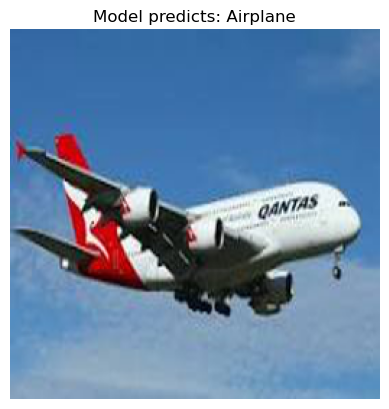

In [31]:
plt.imshow(random_image1)
plt.title(f"Model predicts: {prediction_label3}")
plt.axis('off')
plt.show()


In [32]:
random_image_path4 = "C:\\Users\\User\\Downloads\\Bicyclepic4.jpg"
random_image4, random_image_flat4 = preprocess_image2(random_image_path4)

In [33]:
prediction4 = clf2.predict([random_image_flat4])

In [34]:
if prediction4[0] == 0:
    prediction_label4 = "Airplane"
else:
    prediction_label4 = "Bicycle"

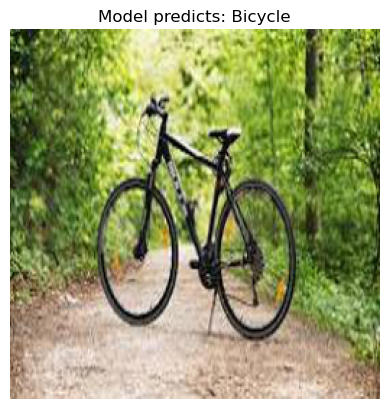

In [35]:
plt.imshow(random_image4)
plt.title(f"Model predicts: {prediction_label4}")
plt.axis('off')  # Hide axis labels
plt.show()

In [36]:
report1 = classification_report(Y_test, Y_pred, target_names=None)
report1

'              precision    recall  f1-score   support\n\n           0       0.70      0.58      0.64        12\n           1       0.44      0.57      0.50         7\n\n    accuracy                           0.58        19\n   macro avg       0.57      0.58      0.57        19\nweighted avg       0.61      0.58      0.59        19\n'

In [37]:
report2 = classification_report(Y_test, Y_pred2, target_names=None)
report2

'              precision    recall  f1-score   support\n\n           0       1.00      0.75      0.86        12\n           1       0.70      1.00      0.82         7\n\n    accuracy                           0.84        19\n   macro avg       0.85      0.88      0.84        19\nweighted avg       0.89      0.84      0.84        19\n'

In [41]:
conf_matrix1 = confusion_matrix(Y_test, Y_pred)

In [42]:
conf_matrix1

array([[7, 5],
       [3, 4]], dtype=int64)

In [43]:
conf_matrix2 = confusion_matrix(Y_test,Y_pred2)

In [44]:
conf_matrix2

array([[9, 3],
       [0, 7]], dtype=int64)